<a href="https://colab.research.google.com/github/xshi19/Technical-Incerto-Python/blob/main/techincerto_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
from scipy.stats import powerlaw, norm, t, cauchy
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Chapter 3

## 3.1
### Figure 3.1 - Survival function

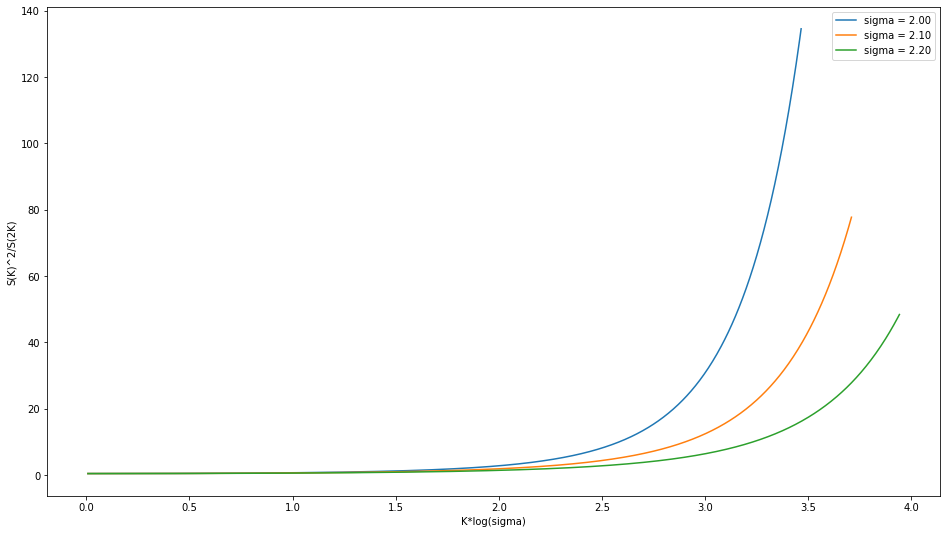

In [32]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of sigma values
sigma_values = [2.0, 2.1, 2.2]

# Create a meshgrid of K and sigma values
K, sigma = np.meshgrid(K_values, sigma_values)

# Calculate the survival functions
S_K = norm.sf(K, loc=0, scale=sigma)
S_2K = norm.sf(2*K, loc=0, scale=sigma)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Calculate K*log(sigma)
x = K * np.log(sigma)

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, s in enumerate(sigma_values):
    ax.plot(x[i,:], ratio[i,:], label='sigma = {:.2f}'.format(s))
ax.set_xlabel('K*log(sigma)')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

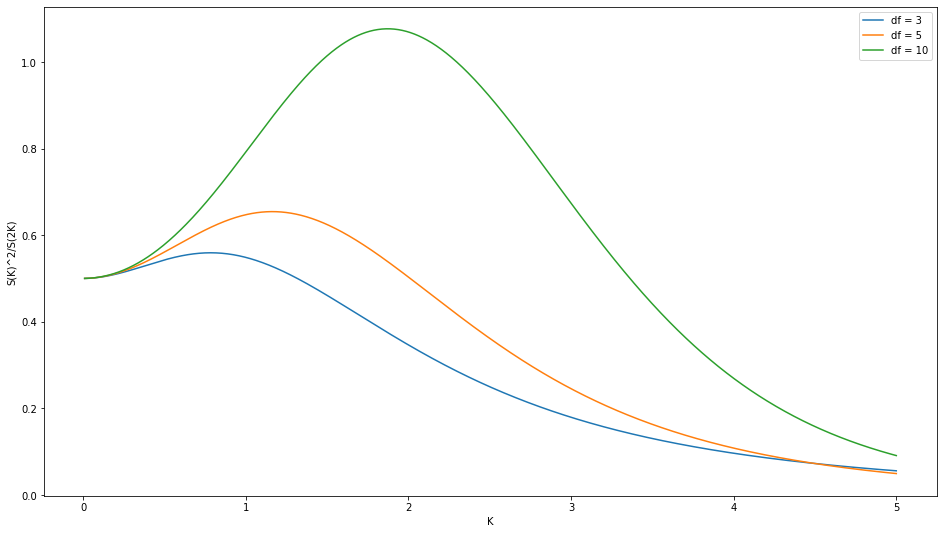

In [40]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of degrees of freedom
df_values = [3, 5, 10]

# Create a meshgrid of K and degrees of freedom values
K, df = np.meshgrid(K_values, df_values)

# Calculate the survival functions
S_K = t.sf(K, df, loc=0, scale=1)
S_2K = t.sf(2*K, df, loc=0, scale=1)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, d in enumerate(df_values):
    ax.plot(K[i,:], ratio[i,:], label='df = {}'.format(d))
ax.set_xlabel('K')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

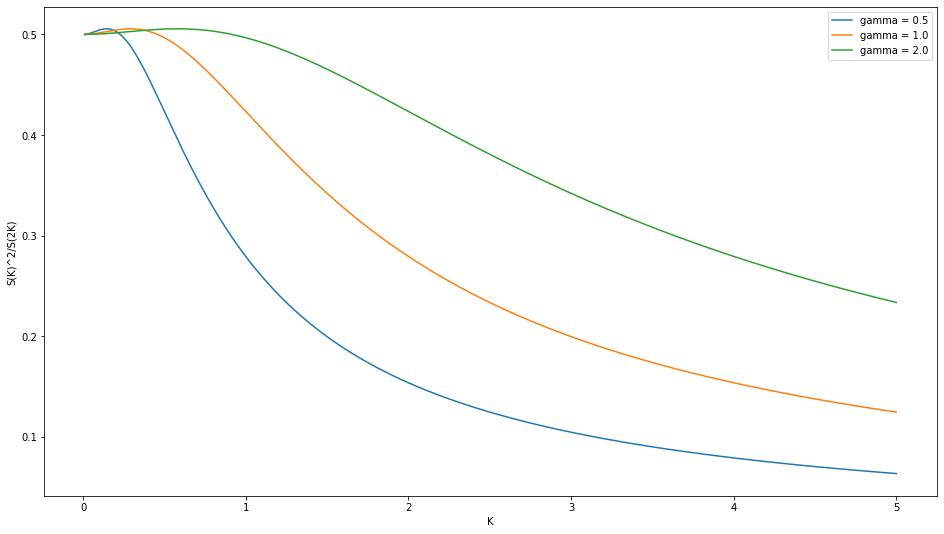

In [41]:
# Define the range of K values
K_values = np.linspace(0.01, 5, 1000)

# Define the range of scale parameters
gamma_values = [0.5, 1.0, 2.0]

# Create a meshgrid of K and scale parameter values
K, gamma = np.meshgrid(K_values, gamma_values)

# Calculate the survival functions
S_K = cauchy.sf(K, loc=0, scale=gamma)
S_2K = cauchy.sf(2*K, loc=0, scale=gamma)

# Calculate the ratio S(K)^2/S(2K)
ratio = (S_K**2) / S_2K

# Generate the plot
fig, ax = plt.subplots(figsize=(16, 9))
for i, g in enumerate(gamma_values):
    ax.plot(K[i,:], ratio[i,:], label='gamma = {:.1f}'.format(g))
ax.set_xlabel('K')
ax.set_ylabel('S(K)^2/S(2K)')
ax.legend()

plt.show()

<AxesSubplot:>

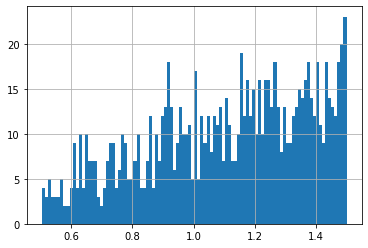

In [ ]:

# Define parameters for the two distributions
alpha1 = 1.5  # power law exponent for distribution 1
alpha2 = 1.5  # power law exponent for distribution 2
xmin1 = 0.5   # lower bound for distribution 1
xmin2 = 0.5   # lower bound for distribution 2
npts = 1000   # number of points to plot

# Generate random samples from the two distributions
x1 = powerlaw.rvs(alpha1, size=npts) + xmin1
x2 = powerlaw.rvs(alpha2, size=npts) + xmin2
pd.Series(x2).hist(bins=100)

In [ ]:
# Create a grid of points to plot the iso-density contours
xgrid, ygrid = np.meshgrid(np.linspace(0.1, 10, 100), np.linspace(0.1, 10, 100))
z1 = powerlaw.pdf(xgrid, alpha1, scale=xmin1)
z2 = powerlaw.pdf(ygrid, alpha2, scale=xmin2)
zgrid = z1 * z2

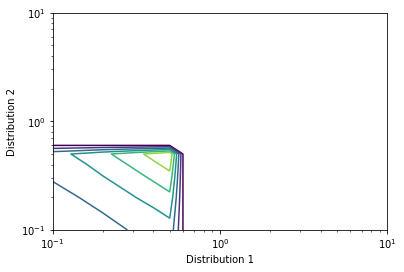

In [ ]:
# Plot the iso-density contours
plt.contour(xgrid, ygrid, zgrid)
plt.xlabel('Distribution 1')
plt.ylabel('Distribution 2')
plt.xscale('log')
plt.yscale('log')
plt.show()

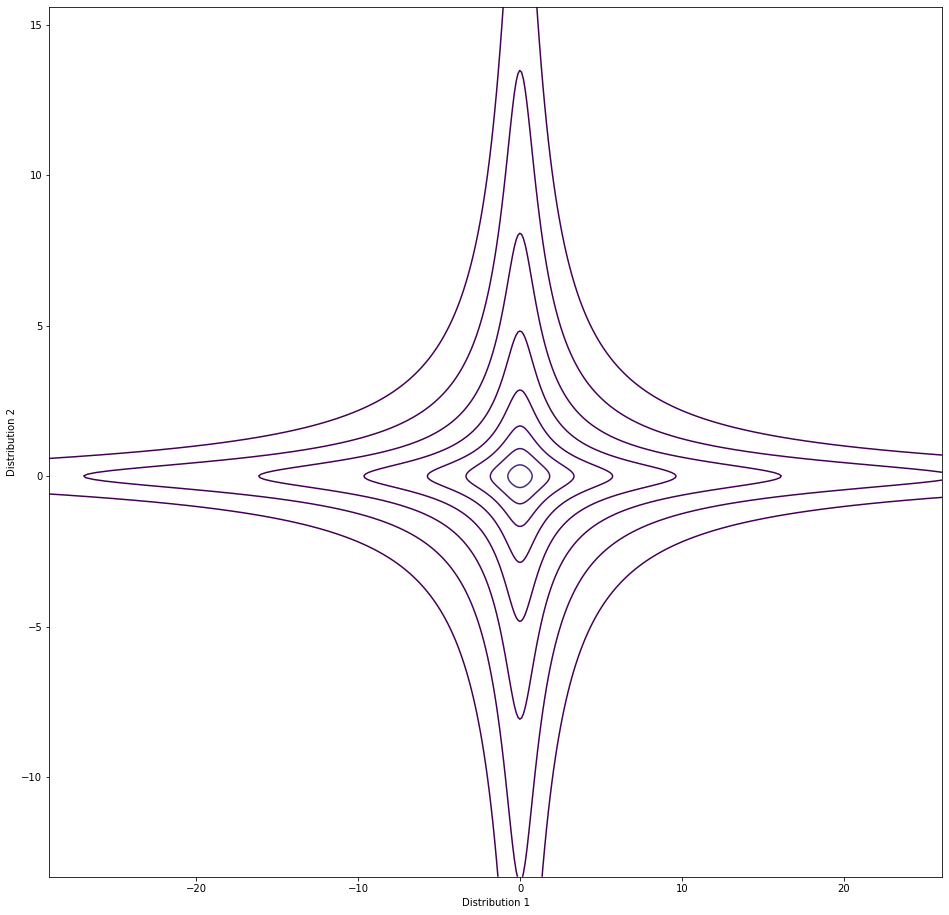

In [ ]:
# Define parameters for the two distributions
gamma1 = 1.0  # scale parameter for distribution 1
gamma2 = 0.5  # scale parameter for distribution 2
npts = 1000   # number of points to plot

# Create a grid of points to plot the iso-density contours
xq10, xq90 = np.percentile(np.random.standard_cauchy(npts) * gamma1, [1, 99])
yq10, yq90 = np.percentile(np.random.standard_cauchy(npts) * gamma2, [1, 99])
xgrid, ygrid = np.meshgrid(np.linspace(xq10, xq90, 500), np.linspace(yq10, yq90, 500))
z1 = 1 / (np.pi * gamma1 * (1 + ((xgrid / gamma1)**2)))
z2 = 1 / (np.pi * gamma2 * (1 + ((ygrid / gamma2)**2)))
zgrid = z1 * z2

# Set the figure size
plt.figure(figsize=(16, 16))

# Plot the iso-density contours
z_lb, z_ub = np.percentile(zgrid, [20, 80])

plt.contour(xgrid, ygrid, zgrid, levels=np.logspace(-4, 0, 10))

# # Plot the line x + y = 10
# xline = np.linspace(xq10, xq90, 100)
# yline = 10 - xline
# plt.plot(xline, yline, color='r', linestyle='--', linewidth=2)

# Add axis labels and legend
plt.xlabel('Distribution 1')
plt.ylabel('Distribution 2')
#plt.legend(['x + y = 20'])

# Display the plot
plt.show()

In [ ]:
np.max(zgrid)

0.20260190638033063

In [ ]:
np.min(zgrid)

1.9977341887689158e-07

In [ ]:
np.logspace(np.log10(z_lb), np.log10(z_ub), 10)

array([6.61907485e-07, 1.07577605e-06, 1.74842277e-06, 2.84165293e-06,
       4.61844329e-06, 7.50620110e-06, 1.21995771e-05, 1.98275638e-05,
       3.22250750e-05, 5.23743345e-05])

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

In [ ]:
z_lb

6.619074853914062e-07

In [ ]:
z_ub

5.2374334522098475e-05